Name: Khushi Shah

Rollno: B067

Aim: To apply image morphology on the given test image

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt 
from skimage.color import rgb2gray
from scipy import signal

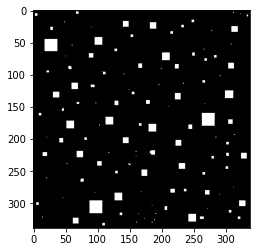

In [ ]:
image=io.imread('/content/squares.tif')
plt.imshow(image, cmap='gray')

In [ ]:
image.shape

(339, 338)

In [ ]:
[rows,cols]=image.shape

In [ ]:
image[25][54]

0

In [ ]:
#Using thresholding to convert image to binary
for r in range(rows):
  for c in range(cols):
    if image[r][c]>100:
        image[r][c]=255
    else:
      image[r][c]=0

In [ ]:
image_erosion=image.copy()

In [ ]:
sz=3 #sz is size of structuring element
se=255*np.ones([sz,sz]) #se is structuring element
se[1][1]

255.0

In [ ]:
se

array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.]])

In [ ]:
center=int((sz-1)/2)
#if se and the size of sq are exactly the same then center of se will be a part of eroded image
#we extract a part of image to check if that and se are of equal size
for r in range(center,rows):
  for c in range(center,cols):
    temp=image[r-center:r+center+1,c-center:c+center+1]
    if np.array_equal(temp,se):
      image_erosion[r][c] = 255
    else:
      image_erosion[r][c] = 0

Text(0.5, 1.0, 'Eroded image')

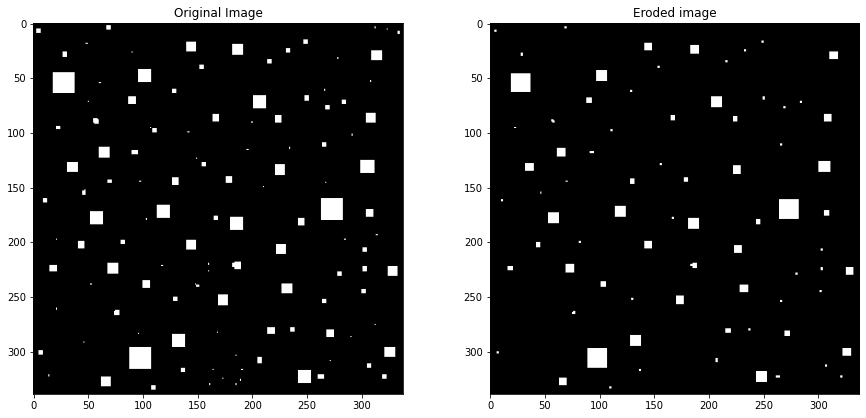

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image, cmap = 'gray')
plt.title ('Original Image')
plt.subplot(2,2,2)
plt.imshow(image_erosion, cmap = 'gray')
plt.title ('Eroded image')

In [ ]:
#squares at the edges remain cuz we are not processing the edges

In [ ]:
image_dilation=image.copy()

In [ ]:
sz=3
se=255*np.ones([sz,sz])

In [ ]:
#In dilation even if 1 element of se is same as part of the image then center of se will be part of diluted image
center=int((sz-1)/2)
for r in range(center,rows):
  for c in range(center,cols):
    temp=image[r-center:r+center+1,c-center:c+center+1]
    if np.isin(255,temp):
      image_dilation[r][c] = 255
    else:
      image_dilation[r][c] = 0

Text(0.5, 1.0, 'Dilated image')

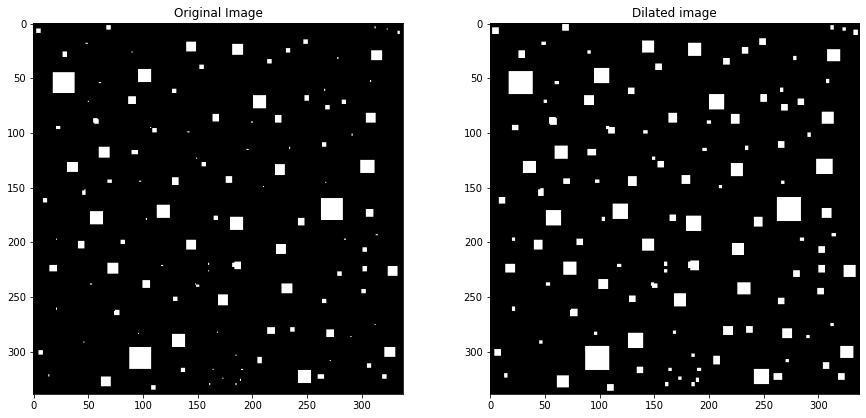

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image, cmap = 'gray')
plt.title ('Original Image')
plt.subplot(2,2,2)
plt.imshow(image_dilation, cmap = 'gray')
plt.title ('Dilated image')

In [ ]:
sz = 11
se=255*np.ones([sz,sz])
center=int((sz-1)/2)
#erosion
image_e=image.copy()
for r in range(center,rows):
  for c in range(center,cols):
    temp=image[r-center:r+center+1,c-center:c+center+1]
    if np.array_equal(temp,se):
      image_e[r][c] = 255
    else:
      image_e[r][c] = 0

#dilation of eroded image
image_d=image_e.copy()
for r in range(center,rows):
  for c in range(center,cols):
    temp=image_e[r-center:r+center+1,c-center:c+center+1]
    if np.isin(255,temp):
      image_d[r][c] = 255
    else:
      image_d[r][c] = 0


Text(0.5, 1.0, 'Dilated image')

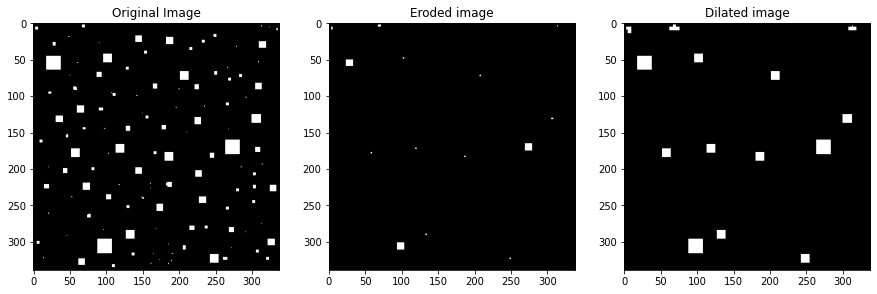

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.imshow(image, cmap = 'gray')
plt.title ('Original Image')
plt.subplot(2,3,2)
plt.imshow(image_e, cmap = 'gray')
plt.title ('Eroded image')
plt.subplot(2,3,3)
plt.imshow(image_d, cmap = 'gray')
plt.title ('Dilated image')

Conclusion: By using square structuring element of size 11x11 the eroded image shows all the squares which are equal to 11x11 or more than that. If size of structuring element is increased to 21x21 all the squares dissapper from the eroded image. This shows that the given image contains squares of size less than 21x21. To retain the smallest square in eroded image size of structuring element is reduced to 3x3.

The given image is dilated using white structuring element of size 11x11. Size of each square increases by 5 rows and 5 cols on both sides. The size of dilated object can be increased or reduced by increasing or reducing size of structuring element.

The eroded image is dilated by using structuring element of the same size. It is observed that erosion operation gets rid of all the squares which are smaller than the structuring element and the dilation operation regains the size of the eroded squares.